## Breast Cancer Classification
<p>To classify the type of breast cancer i will use different classification Algorithms and at the end choose the best model.</p>

### Columns
- Sample code number
- Clump Thickness
- Uniformity of Cell Size
- Uniformity of Cell Shape
- Marginal Adhesion
- Single Epithelial Cell Size
- Bare Nuclei
- Bland Chromatin
- Normal Nucleoli
- Mitoses
- Class

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use("ggplot")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
dataset = pd.read_csv("breast_cancer.csv")
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
dataset.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [4]:
X = dataset.iloc[:, 1:-1].values
y= dataset.iloc[:, -1].values

In [5]:
dataset.shape

(683, 11)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


<p>The dataset is clean, the column are all numerical and there is no missing value</p>

In [7]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
dataset.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

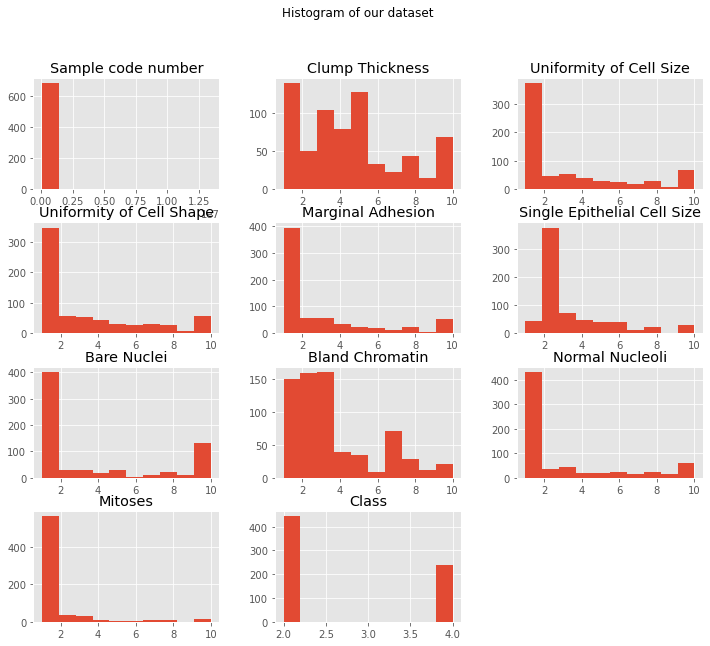

In [9]:
dataset.hist(figsize=(12,10))
plt.suptitle("Histogram of our dataset")
plt.show();

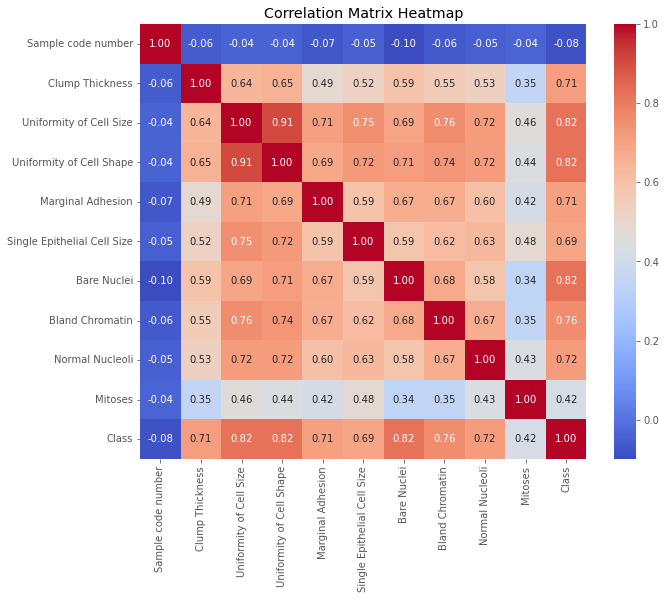

In [10]:
plt.figure(figsize=(10, 8))
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
dataset["Clump Thickness"].unique()

array([ 5,  3,  6,  4,  8,  1,  2,  7, 10,  9])

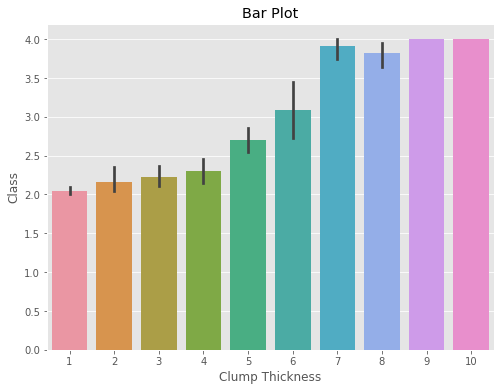

In [12]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Clump Thickness' , y='Class', data=dataset)
plt.xlabel('Clump Thickness')
plt.ylabel('Class')
plt.title('Bar Plot')
plt.show()

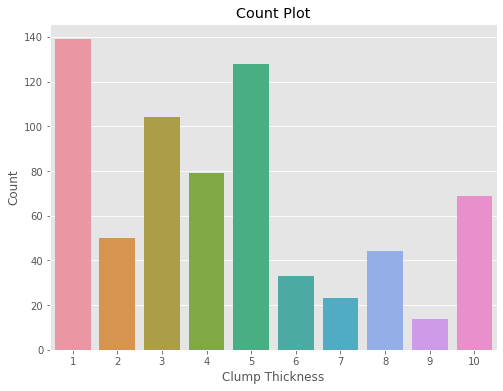

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Clump Thickness', data=dataset)
plt.xlabel('Clump Thickness')
plt.ylabel('Count')
plt.title('Count Plot')
plt.show()

In [14]:


columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']

columns

['Sample code number',
 'Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses',
 'Class']

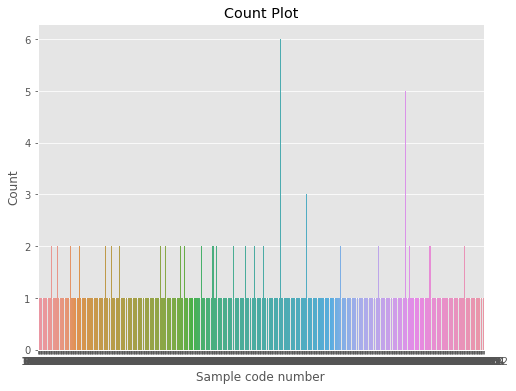

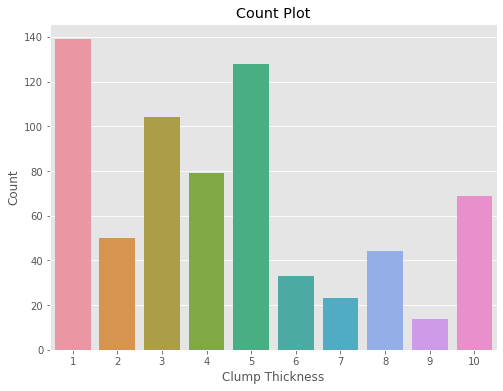

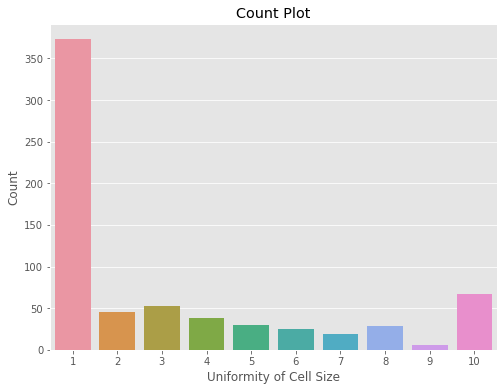

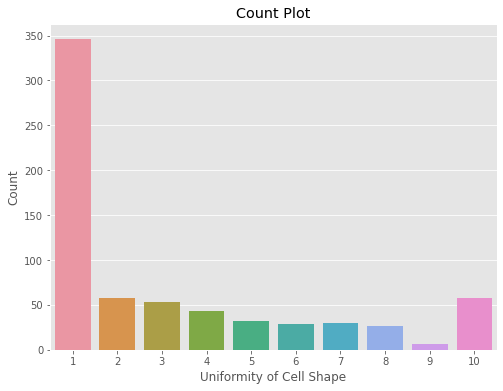

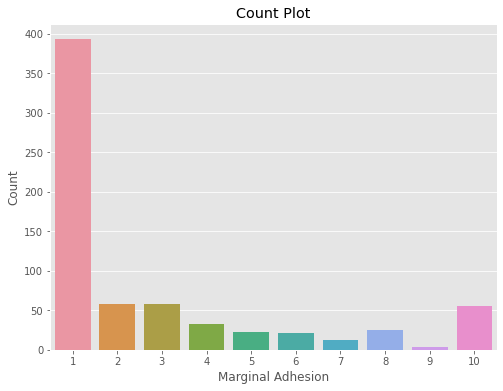

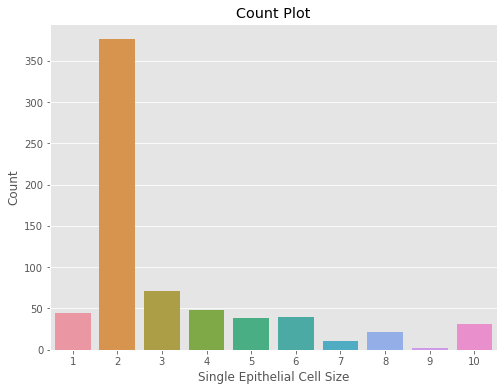

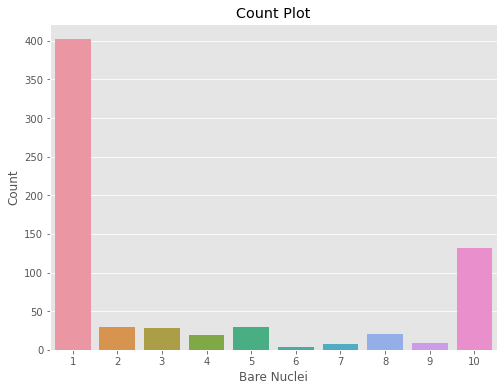

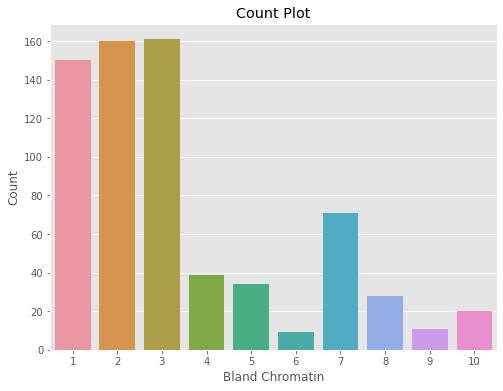

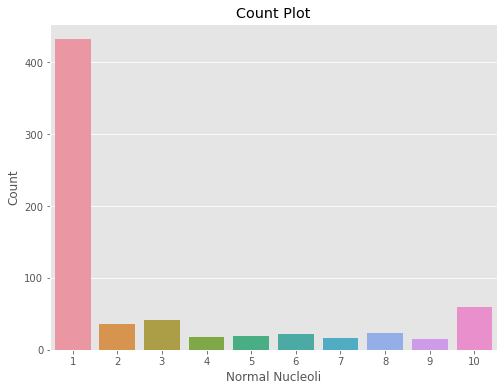

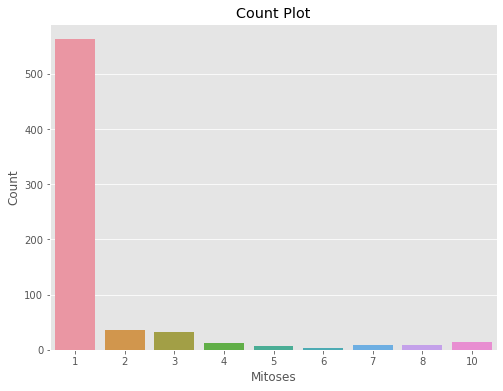

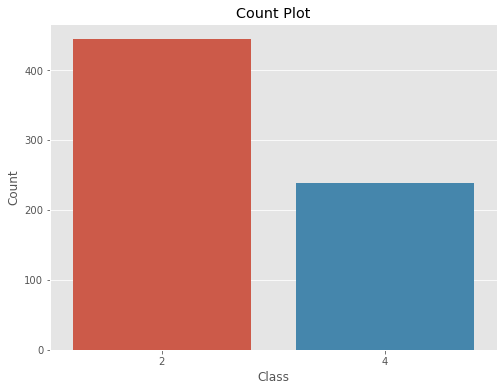

In [15]:
for col in columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=dataset)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title('Count Plot')
    plt.show()

### We can see that the 'Sample code number' does not provide us with any value so we will drop it

In [16]:
df = dataset.drop('Sample code number', axis=1)
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


## Preprocessing

In [17]:
#subsetting the dataset into dependent variable and independent variables

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [18]:
X = X.values # converting it to numpy array
X

array([[ 5,  1,  1, ...,  3,  1,  1],
       [ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]])

In [19]:
y

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64

 since we have two classes in the dependent var (y) {2,4} we can as well change it to {0,1}

In [20]:
y = y.replace({2:0,4:1})
y =y.values # converting it to a numpy array
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

## Building models

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=0)



In [22]:
print(X_train)

[[10  1  1 ...  5  4  1]
 [ 1  1  1 ...  3  1  1]
 [ 5  1  1 ...  3  1  1]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 3  1  1 ...  2  1  1]
 [10  9  7 ...  7  7  1]]


In [23]:
print(y)

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

## Feature Scaling

Normally we would have scaled the independent variables but you can see that their values are between 1 and 10 that is to say that the data is already scaled however i will leave the code for standard scaler should you want to give it a try.

from sklearn.preprocessing import StandardScaler
- sc = StandardScaler()
- X_train = sc.fit_transform(X_train)
- X_test = sc.transform(X_test)

## K-NN model

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=0)
k_value = range(3,50)
best_k = 0
best_accuracy = 0
for k in k_value:
    knn_classifier = KNeighborsClassifier(n_neighbors=k, 
                                      metric="minkowski",
                                     p=2)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

        
print(f"The best accuracy for k after from 3 to 50 accuracy is: {round(best_accuracy,3)*100}%")
print(f"The best K value for the model is: {best_k}")
print(cm)

The best accuracy for k after from 3 to 50 accuracy is: 97.1%
The best K value for the model is: 3
[[85  2]
 [ 6 44]]


Here i will build the KNN model with the best value we got from the iteration which is 3

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=0)
knn_classifier = KNeighborsClassifier(n_neighbors=3, 
                                      metric="minkowski",
                                     p=2)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
    
accuracy_knn = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuracy score for KNN is {round(accuracy_knn,3)*100}%")

[[85  2]
 [ 2 48]]
Accuracy score for KNN is 97.1%


## Logistic Regression Model

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                test_size=0.2,
                                                random_state=0)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
accuracy_logistic = accuracy_score(y_test, y_pred)
print(cm)
print(f"Accuracy score for logistic Regression is {round(accuracy_logistic,3)*100}%")

[[84  3]
 [ 3 47]]
Accuracy score for logistic Regression is 95.6%


## Support Vector Machine Model

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)


classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_SVM= accuracy_score(y_test, y_pred)
print(f"Accuracy score for Support Vector Classifier is {round(accuracy_SVM,3)*100}%")

[[83  4]
 [ 2 48]]
Accuracy score for Support Vector Classifier is 95.6%


## Kernel SVM Model

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 0)

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_kernel = accuracy_score(y_test, y_pred)
print(f"Accuracy score for Kernel SVC is {accuracy_kernel:.3f}%")

[[83  4]
 [ 1 49]]
Accuracy score for Kernel SVC is 0.964%


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,
                                                    random_state = 0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_NaiveB = accuracy_score(y_test, y_pred)
print(f"Accuracy score for Naive Bayes is {accuracy_NaiveB:.3f}%")

[[80  7]
 [ 0 50]]
Accuracy score for Naive Bayes is 0.949%


## Decision Tree model

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_Decision = accuracy_score(y_test, y_pred)
print(f"Accuracy score for Decision Tree is {round(accuracy_Decision,3)*100}%")

[[84  3]
 [ 3 47]]
Accuracy score for Decision Tree is 95.6%


## Random Forest Classifier

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

RF_classifier = RandomForestClassifier(n_estimators=50,
                                    max_depth=5,
                                   random_state=0)
RF_classifier.fit(X_train, y_train)
y_pred = RF_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_RF = accuracy_score(y_test, y_pred)
print(f"Accuracy score for Decision Tree is {round(accuracy_RF,3)*100}%")

[[84  3]
 [ 1 49]]
Accuracy score for Decision Tree is 97.1%


In [32]:
models = pd.DataFrame({
    "Models": ["KNN Classifier","Logistic Model", "Support Vector", "Kernel SVM","Decision Tree", "Random Forest Classifier"],
    "Score": [accuracy_knn, accuracy_logistic, accuracy_SVM, accuracy_kernel, accuracy_Decision, accuracy_RF]
})

models.sort_values(by="Score", ascending=False)

,Models,Score
0,KNN Classifier,0.970803
5,Random Forest Classifier,0.970803
3,Kernel SVM,0.963504
1,Logistic Model,0.956204
2,Support Vector,0.956204
4,Decision Tree,0.956204


##### We can see that the models perfomed well so we will go ahead and select the top 2 which are the KNN and Random Forest and perform random forest to know which model can avoid overfitting 

### Cross validation

In [33]:
# KNN 
accuracies = cross_val_score(estimator=knn_classifier,X=X_train,
                            y = y_train,
                            cv=10)

print("Accuracy: {: .2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {: .2f} %".format(accuracies.std()*100))

Accuracy:  97.07 %
Standard Deviation:  1.45 %


In [34]:
## Random FOREST
accuracies = cross_val_score(estimator=RF_classifier,X=X_train,
                            y = y_train,
                            cv=10)

print("Accuracy: {: .2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {: .2f} %".format(accuracies.std()*100))

Accuracy:  96.52 %
Standard Deviation:  2.39 %


####### It is clear that the KNN is the best model to pick here, the mean of it's accuracies is > than the mean of the accuracy of the Random Forest Classifier, also the standard deviation of the KNN Classifier < that the standard deviation of the Random forest 